In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [2]:
from dataset import Dataset

In [3]:
path = r'E:\knns\data\cat_dog'
width = 108
height = 108

In [4]:
loader = Dataset(path=path, width=width, height=height)

In [5]:
y = loader.load_labels(12500, 12500)

In [6]:
X = loader.load_images(path=path)

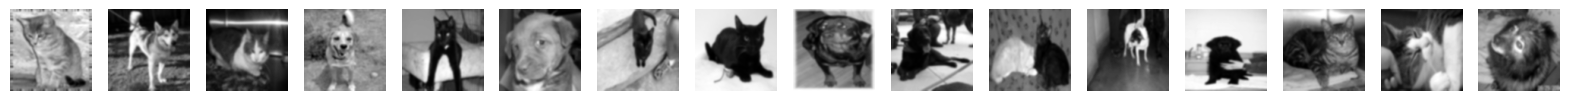

In [7]:
loader.plot_random_samples(X ,16)

In [8]:
print(len(X))
print(len(y))

25000
25000


In [9]:
def train_test_split(X:np.ndarray, y:np.ndarray, train_split:float=0.7, val_split:float=0.2, test_split:float=0.1, random_state=None):
    if float(round(train_split + val_split + test_split)) != 1.0:
        raise ValueError("train_split, val_split and test_split must add up to 1")

    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    train_size = int(X.shape[0] * train_split)
    val_size = int(X.shape[0] * val_split)

    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]
    test_indices = indices[train_size+val_size:]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(X, y)

In [11]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 108, 108)
X_test: (2500, 108, 108)
X_val: (5000, 108, 108)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [12]:
num_training:int = X_train.shape[0]
num_test:int = X_test.shape[0]
num_val:int = X_val.shape[0]

In [13]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 108, 108)
X_test: (2500, 108, 108)
X_val: (5000, 108, 108)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 11664)
X_test: (2500, 11664)
X_val: (5000, 11664)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [15]:
print(np.mean(np.std(X_train, axis=1)))
print(np.var(X_train))

0.9450607152860312
0.8940875005237472


In [16]:
class KNearestNeighbor:

    __slots__ = ['X_train', 'y_train', 'k']

    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.euclidean(X)
        return self.predict_labels(dists, k)
    
    def euclidean(self, X):
        X_square = np.sum(np.square(X), axis=1, keepdims=True)
        X_train_square = np.sum(np.square(self.X_train), axis=1, keepdims=True).T
        X_X_train = np.dot(X, self.X_train.T)
        dists = X_square - 2*X_X_train + X_train_square
        return np.array(dists)

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [17]:
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)

In [18]:
val_dist = classifier.euclidean(X_val)

In [19]:
y_val_pred = classifier.predict_labels(val_dist, k=1)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => Validation accuracy: %f' % (num_correct, num_val, accuracy))

Got 2916 / 5000 correct => Validation accuracy: 0.583200


In [20]:
test_dist = classifier.euclidean(X_test)

In [21]:
y_test_pred = classifier.predict_labels(test_dist, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => Test accuracy: %f' % (num_correct, num_test, accuracy))

Got 1419 / 2500 correct => Test accuracy: 0.567600


In [22]:
index = 0
k = 0

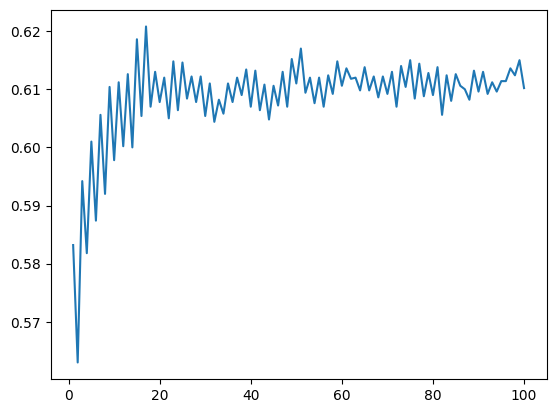

Max accuracy at k= 17
Accuracy = 0.6208


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode

# Fit the model once with the maximum k
max_k = 100
neigh = KNeighborsClassifier(n_neighbors=max_k)
neigh.fit(X_train, y_train)

# Get the distances and indices of the k nearest neighbors for each point in the validation set
distances, indices = neigh.kneighbors(X_val)

lix = []
liy = []
acc = 0
index = 0

# Calculate the accuracy for each k
for k in range(1, max_k + 1):
    knn_labels = y_train[indices[:, :k]]
    y_pred, _ = mode(knn_labels, axis=1)
    accuracy = (y_pred.ravel() == y_val).mean()
    liy.append(accuracy)

    if accuracy > acc:
        acc = accuracy
        index = k - 1

    lix.append(k)

plt.plot(lix, liy)
plt.show()
print(f"Max accuracy at k= {index + 1}")
print(f"Accuracy = {acc}")


In [24]:
k = index + 1

In [25]:
print("Using our own k-NN")
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)
dists = classifier.euclidean(X_val)
y_val_pred = classifier.predict_labels(dists, k=k)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print(f'With k = {k} Got %d / %d correct => Validation accuracy: %f' % (num_correct, num_test, accuracy))

Using our own k-NN
With k = 17 Got 3104 / 2500 correct => Validation accuracy: 0.620800


In [26]:
def predict_image(image_path, X_train, y_train, k=k):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)
    img = (img - np.mean(img)) / np.std(img)
    img = np.reshape(img, (1, img.shape[0] * img.shape[1]))
    classifier = KNearestNeighbor()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(img)    
    if int(y_pred[0]) == 0:
        return "Cat"
    elif int(y_pred[0]) == 1:
        return "Dog"
    else:
        return None

In [27]:
image_path = r"E:\knns\data_new\dog.578.jpg"
prediction = predict_image(image_path, X_train, y_train,k=k)
print("Image is", prediction)

Image is Dog
